In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


#### Ejercicio 1

Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

#### Solución ejercicio 1

In [4]:
df["totmou"].quantile(0.25)

2576.0

In [5]:
df["totmou"].quantile(0.50)

5262.0

In [6]:
df["totmou"].quantile(0.75)

9823.25

Percentiles 25,50 y 75 de totrev

In [7]:
df["totrev"].quantile(0.25)

526.7875

In [8]:
df["totrev"].quantile(0.50)

820.235

In [9]:
df["totrev"].quantile(0.75)

1272.975

Percentiles 25,50 y 75 de eqpdays

In [10]:
df["eqpdays"].quantile(0.25)

210.0

In [11]:
df["eqpdays"].quantile(0.50)

338.0

In [12]:
df["eqpdays"].quantile(0.50)

338.0

### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?

In [13]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("Bases/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [32]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


In [15]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y


In [16]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="left",indicator=True)
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,both
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,both
1031705,4152.0,577.39,Y,675,3.000000,U,NEW YORK CITY AREA,Y,both
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO AREA,Y,both
1076695,4155.0,433.16,N,222,0.000000,U,NORTH FLORIDA AREA,N,both
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO AREA,Y,both
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST AREA,Y,both
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW ENGLAND AREA,Y,both


#### Solución ejercicio 2 

In [17]:
df3[df3['_merge'] == 'left_only']

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge
Customer_ID,,,,,,,,,
1050270,1409.0,407.02,Y,102,NaN,NaN,NaN,NaN,left_only
1020629,15284.0,2370.62,N,445,NaN,NaN,NaN,NaN,left_only
1020451,3604.0,662.42,Y,675,NaN,NaN,NaN,NaN,left_only


### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

#### Solución ejercicio 3

In [18]:
# calculando la desviacion estandar 

df3.groupby("creditcd_x").std()

,totmou,totrev,eqpdays,custcare_Mean
creditcd_x,,,,
N,8620.154772,876.743656,216.562672,5.385639
Y,8668.288580,849.418662,264.605727,6.064524


### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [19]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [20]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [21]:
df_con_etiquetas

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge,Nivel
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC SOUTH AREA,N,both,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC SOUTH AREA,Y,both,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC SOUTH AREA,Y,both,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC SOUTH AREA,N,both,Medio
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC SOUTH AREA,N,both,Medio
...,...,...,...,...,...,...,...,...,...,...
1093180,7333.0,372.45,Y,229,3.000000,U,TENNESSEE AREA,Y,both,Bajo
1018795,4445.0,909.32,Y,692,0.000000,U,TENNESSEE AREA,Y,both,Medio
1055110,12871.0,899.95,N,18,9.666667,U,TENNESSEE AREA,N,both,Medio


In [22]:
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()

totmou
area                          Nivel              
ATLANTIC SOUTH AREA           Alto   13926.143446
                              Bajo    2650.763514
                              Medio   5420.608108
CALIFORNIA NORTH AREA         Alto   16923.098622
                              Bajo    2490.000000
                              Medio   5415.792821
CENTRAL-SOUTH TEXAS AREA      Alto   20606.785599
                              Bajo    3232.813725
                              Medio   6775.936373
CHICAGO AREA                  Alto   13348.808118
                              Bajo    2816.330645
                              Medio   4997.483871
DALLAS AREA                   Alto   20564.633026
                              Bajo    2707.415385
                              Medio   6844.744186
DC-MARYLAND-VIRGINIA AREA     Alto   13190.250000
                              Bajo    2578.475000
                              Medio   5513.337500
GREAT LAKES AREA              Alto   15643.122951
                              Bajo    2555.688525
                              Medio   5920.827869
HOUSTON AREA                  Alto   19911.151188
                              Bajo    3234.834783
                              Medio   7199.372807
LOS ANGELES AREA              Alto   15865.452381
                              Bajo    2600.904762
                              Medio   5828.940299
MIDWEST AREA                  Alto   16387.194109
                              Bajo    2634.964912
                              Medio   5509.856774
NEW ENGLAND AREA              Alto   13696.321515
                              Bajo    2603.923664
                              Medio   5155.675573
NEW YORK CITY AREA            Alto   16748.160825
                              Bajo    2986.430070
                              Medio   6781.557815
NORTH FLORIDA AREA            Alto   13237.594595
                              Bajo    2401.306306
                              Medio   5143.463636
NORTHWEST-ROCKY MOUNTAIN AREA Alto   18100.312222
                              Bajo    2463.401869
                              Medio   5124.574766
OHIO AREA                     Alto   13624.429606
                              Bajo    2323.844037
                              Medio   5394.073394
PHILADELPHIA AREA             Alto   14678.319247
                              Bajo    1965.803279
                              Medio   5724.204918
SOUTH FLORIDA AREA            Alto   20244.939746
                              Bajo    2829.706522
                              Medio   7051.934066
SOUTHWEST AREA                Alto   17785.746667
                              Bajo    2368.095890
                              Medio   5642.215753
TENNESSEE AREA                Alto   16941.573831
                              Bajo    2788.373134
                              Medio   5881.716418

### solución del ejercicio 4

In [25]:
pencentiles25 = df3.groupby("area",as_index= False)["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area",as_index= False)["totrev"].quantile(0.75)

pencentiles25.columns = ["area","percentil25"]
pencentiles75.columns = ["area","percentil75"]
datos= df3.reset_index().merge(pencentiles25,on='area').set_index("Customer_ID")
datos=datos.reset_index().merge(pencentiles75,on='area').set_index("Customer_ID")
datos["Clasificacion"]=np.where(
    datos["totrev"]> datos["percentil75"],
    "Alto",
    np.where(
    datos["totrev"]< datos["percentil25"],
    "Bajo",
    "Medio"
)
)
datos

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,_merge,percentil25,percentil75,Clasificacion
Customer_ID,,,,,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Medio
1076771,288.0,374.98,Y,284,0.000000,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Bajo
1083737,1928.0,396.78,Y,261,0.000000,U,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Bajo
1078557,2781.0,590.26,Y,276,0.000000,N,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Medio
1018015,24069.0,2129.74,Y,199,2.000000,N,NEW ENGLAND AREA,Y,both,497.5700,1185.800,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
1085316,7637.0,744.81,N,254,10.333333,U,SOUTH FLORIDA AREA,N,both,582.0225,1451.255,Medio
1096235,8731.0,556.88,Y,220,0.333333,Y,SOUTH FLORIDA AREA,Y,both,582.0225,1451.255,Bajo
1075355,5891.0,696.77,Y,103,0.000000,U,SOUTH FLORIDA AREA,Y,both,582.0225,1451.255,Medio


### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

#### Solución ejercicio 5

Text(0.5, 1.0, 'nivel vs  tutmou')

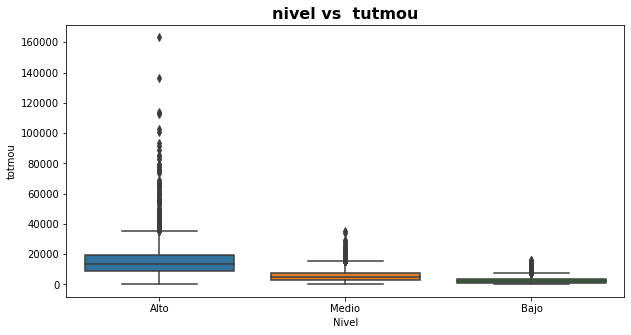

In [31]:
import seaborn as sns 
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(x='Nivel', y='totmou', data=df_con_etiquetas)
ax.set_title('nivel vs  tutmou',
             fontsize=16, weight="bold")


Text(0.5, 1.0, ' creditcd_x vs tutmou')

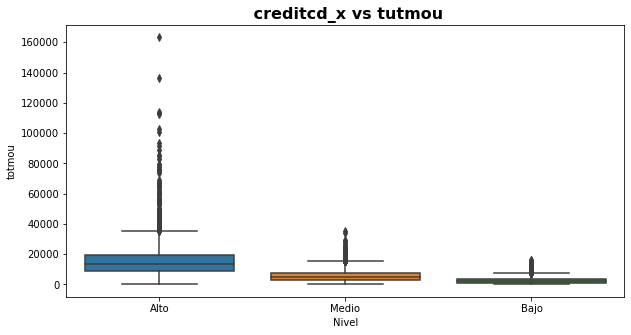

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(x='Nivel', y='totmou', data=df_con_etiquetas)
ax.set_title(' creditcd_x vs tutmou',
             fontsize=16, weight="bold")